In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/listings.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20250624193519,2025-06-28,city scrape,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Please note that elevated rates apply for New ...,This is the one of the bests spots in Rio. Bec...,https://a0.muscache.com/pictures/65320518/3069...,68997,...,4.91,4.78,4.67,NaN,f,1,1,0,0,1.86
1,25026,https://www.airbnb.com/rooms/25026,20250624193519,2025-07-04,city scrape,Beautiful Modern Decorated Studio in Copacabana,"**Fully renovated in Dec 2022, new kitchen, n...",Copacabana is a lively neighborhood and the ap...,https://a0.muscache.com/pictures/7c08fa4f-1d7b...,102840,...,4.93,4.85,4.65,NaN,f,1,1,0,0,1.71
2,35764,https://www.airbnb.com/rooms/35764,20250624193519,2025-06-25,city scrape,COPACABANA SEA BREEZE - RIO - 25 X Superhost,Our newly renovated studio is located in the b...,Our guests will experience living with a local...,https://a0.muscache.com/pictures/23782972/1d3e...,153691,...,4.95,4.95,4.89,NaN,f,1,1,0,0,2.88
3,48305,https://www.airbnb.com/rooms/48305,20250624193519,2025-06-26,city scrape,Bright 6bed Penthouse Seconds from Beach,Enter Bossa Nova's history by staying in the v...,Enter Bossa Nova history by staying in the ver...,https://a0.muscache.com/pictures/miso/Hosting-...,70933,...,4.84,4.95,4.59,NaN,t,6,5,1,0,1.05
4,48901,https://www.airbnb.com/rooms/48901,20250624193519,2025-07-01,city scrape,Extra large 4BD 3BT on the AtlanticAve. Copaca...,LARGE Beach side 4 bedrooms 2 Complete bathro...,"Plenty of shops, entertainment andrestaurants<...",https://a0.muscache.com/pictures/hosting/Hosti...,222884,...,4.83,4.94,4.60,NaN,f,1,1,0,0,0.40


In [3]:
print(f'Size: {df.shape[0]} examples\n')

for i in range(df.shape[1]):
    col = df.columns[i]
    print(f'{i+1}:\t {col}  |  {df[col].dtype} ({df[col].nunique()})  |  nº NAN: {df[col].isna().sum()}')

Size: 42572 examples

1:	 id  |  int64 (42572)  |  nº NAN: 0
2:	 listing_url  |  object (42572)  |  nº NAN: 0
3:	 scrape_id  |  int64 (1)  |  nº NAN: 0
4:	 last_scraped  |  object (8)  |  nº NAN: 0
5:	 source  |  object (2)  |  nº NAN: 0
6:	 name  |  object (40289)  |  nº NAN: 0
7:	 description  |  object (38004)  |  nº NAN: 1011
8:	 neighborhood_overview  |  object (14274)  |  nº NAN: 26059
9:	 picture_url  |  object (41726)  |  nº NAN: 0
10:	 host_id  |  int64 (24935)  |  nº NAN: 0
11:	 host_url  |  object (24935)  |  nº NAN: 0
12:	 host_name  |  object (7058)  |  nº NAN: 1480
13:	 host_since  |  object (4948)  |  nº NAN: 1543
14:	 host_location  |  object (626)  |  nº NAN: 9848
15:	 host_about  |  object (8725)  |  nº NAN: 23175
16:	 host_response_time  |  object (4)  |  nº NAN: 8004
17:	 host_response_rate  |  object (85)  |  nº NAN: 8004
18:	 host_acceptance_rate  |  object (100)  |  nº NAN: 4994
19:	 host_is_superhost  |  object (2)  |  nº NAN: 1376
20:	 host_thumbnail_url  |  ob

(todo exemplo tem pelo menos 1 atributo ausente)

---
## info do host

In [4]:
df[[
    'host_location',
    'host_response_time', #ok
    'host_response_rate', #ok
    'host_is_superhost', #ok
    'host_total_listings_count', #ok
    'host_identity_verified', #ok
    'host_verifications'
]]

,host_location,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_identity_verified,host_verifications
0,"Rio de Janeiro, Brazil",within an hour,100%,f,5.0,t,"['email', 'phone']"
1,"Rio de Janeiro, Brazil",NaN,NaN,t,5.0,t,"['email', 'phone']"
2,"Rio de Janeiro, Brazil",within an hour,100%,t,2.0,t,"['email', 'phone']"
3,"Rio de Janeiro, Brazil",within an hour,100%,t,33.0,t,"['email', 'phone', 'work_email']"
4,"Rio de Janeiro, Brazil",within an hour,100%,f,7.0,t,"['email', 'phone']"
...,...,...,...,...,...,...,...
42567,NaN,NaN,NaN,f,1.0,t,['phone']
42568,"Rio de Janeiro, Brazil",NaN,NaN,f,1.0,t,"['email', 'phone']"
42569,NaN,within an hour,93%,t,12.0,t,"['email', 'phone']"
42570,Brazil,NaN,NaN,f,1.0,t,['phone']


In [33]:
df['host_location'].value_counts()

host_location
Rio de Janeiro, Brazil             25166
State of Rio de Janeiro, Brazil     2277
Rio, Brazil                          817
Brazil                               672
São Paulo, Brazil                    645
                                   ...  
Presidente Venceslau, Brazil           1
Beaulieu-sur-Mer, France               1
Manchester, United Kingdom             1
Maravilha, Brazil                      1
Mariana, Brazil                        1
Name: count, Length: 626, dtype: int64

In [40]:
df.loc[df['host_location'].str.contains('(Rio,)|(Rio de Janeiro)', regex=True, na=False), 'host_location'].value_counts()

/tmp/ipykernel_25754/167682424.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df.loc[df['host_location'].str.contains('(Rio,)|(Rio de Janeiro)', regex=True, na=False), 'host_location'].value_counts()


host_location
Rio de Janeiro, Brazil             25166
State of Rio de Janeiro, Brazil     2277
Rio, Brazil                          817
Name: count, dtype: int64

In [47]:
bairros = df['neighbourhood_cleansed'].unique()

In [59]:
df.loc[df['host_location'].isna() & df['host_neighbourhood'].notna(), 'host_neighbourhood']

68                   Vidigal
85                Copacabana
94                Copacabana
229               Copacabana
330               Copacabana
                ...         
42561    Vicente de Carvalho
42562                 Cosmos
42565                Ipanema
42567             Copacabana
42569                Ipanema
Name: host_neighbourhood, Length: 7347, dtype: object

In [63]:
mask = df.apply(lambda x: ((x.host_location=='Rio de Janeiro, Brazil') or (x.host_location=='Rio, Brazil')) and (x.host_neighbourhood not in bairros), axis=1)
df.loc[mask, ['host_location','host_neighbourhood']]

,host_location,host_neighbourhood
25,"Rio de Janeiro, Brazil",Jardin Botânico
31,"Rio de Janeiro, Brazil",Lapa
66,"Rio de Janeiro, Brazil",NaN
67,"Rio de Janeiro, Brazil",Lapa
71,"Rio de Janeiro, Brazil",Jardin Botânico
...,...,...
42251,"Rio de Janeiro, Brazil",Vila de Ponta Negra
42321,"Rio de Janeiro, Brazil",NaN
42384,"Rio de Janeiro, Brazil",Ilha do Governador
42398,"Rio de Janeiro, Brazil",City Areal


In [60]:
#df['host_neighbourhood_plus'] = 
df.apply(lambda x: ((x.host_location=='Rio de Janeiro, Brazil') or (x.host_location=='Rio, Brazil')) or (x.host_neighbourhood in bairros), axis=1)

0        True
1        True
2        True
3        True
4        True
         ... 
42567    True
42568    True
42569    True
42570    True
42571    True
Length: 42572, dtype: bool

In [20]:
pd.isna(df.at[35,'price'])

True

In [22]:
df['price'] = df['price'].apply(lambda x: x if pd.isna(x) else float(x[1:].replace(',','')))

<Axes: xlabel='maximum_nights_avg_ntm', ylabel='price'>

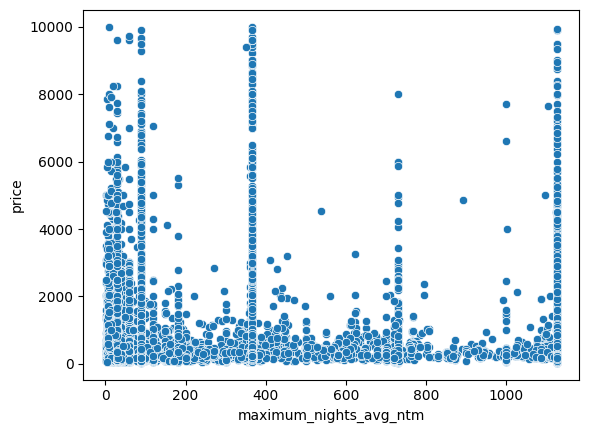

In [26]:
sns.scatterplot(df[df['price']<10000], x='maximum_nights_avg_ntm', y='price')

---
## info da casa

In [68]:
print(f'Size: {df.shape[0]} examples\n')

for i in range(df.shape[1]):
    col = df.columns[i]
    print(f'{i+1}:\t {col}  |  {df[col].dtype} ({df[col].nunique()})  |  nº NAN: {df[col].isna().sum()}')

Size: 42572 examples

1:	 id  |  int64 (42572)  |  nº NAN: 0
2:	 listing_url  |  object (42572)  |  nº NAN: 0
3:	 scrape_id  |  int64 (1)  |  nº NAN: 0
4:	 last_scraped  |  object (8)  |  nº NAN: 0
5:	 source  |  object (2)  |  nº NAN: 0
6:	 name  |  object (40289)  |  nº NAN: 0
7:	 description  |  object (38004)  |  nº NAN: 1011
8:	 neighborhood_overview  |  object (14274)  |  nº NAN: 26059
9:	 picture_url  |  object (41726)  |  nº NAN: 0
10:	 host_id  |  int64 (24935)  |  nº NAN: 0
11:	 host_url  |  object (24935)  |  nº NAN: 0
12:	 host_name  |  object (7058)  |  nº NAN: 1480
13:	 host_since  |  object (4948)  |  nº NAN: 1543
14:	 host_location  |  object (626)  |  nº NAN: 9848
15:	 host_about  |  object (8725)  |  nº NAN: 23175
16:	 host_response_time  |  object (4)  |  nº NAN: 8004
17:	 host_response_rate  |  object (85)  |  nº NAN: 8004
18:	 host_acceptance_rate  |  object (100)  |  nº NAN: 4994
19:	 host_is_superhost  |  object (2)  |  nº NAN: 1376
20:	 host_thumbnail_url  |  ob

In [11]:
df[[
    'latitude', #ok
    'longitude', #ok
    'neighbourhood_cleansed',
    'property_type', #talvez?
    'room_type', #ok
    'accommodates', #ok
    'bathrooms', #ok
    'bedrooms', #ok
    'beds', #ok
    'amenities'
]]

,latitude,longitude,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities
0,-22.965990,-43.179400,Copacabana,Entire condo,Entire home/apt,5,1.0,2.0,2.0,"[""Oven"", ""Building staff"", ""TV with standard c..."
1,-22.976490,-43.191220,Copacabana,Entire rental unit,Entire home/apt,3,1.0,1.0,2.0,"[""Window AC unit"", ""Room-darkening shades"", ""D..."
2,-22.981070,-43.191360,Copacabana,Entire loft,Entire home/apt,2,1.5,1.0,1.0,"[""Building staff"", ""Bed linens"", ""Heating"", ""P..."
3,-22.985910,-43.203020,Ipanema,Entire rental unit,Entire home/apt,13,7.0,6.0,7.0,"[""Pack \u2019n play/Travel crib"", ""Private pat..."
4,-22.965740,-43.175140,Copacabana,Entire rental unit,Entire home/apt,10,2.5,4.0,4.0,"[""Microwave"", ""Dedicated workspace"", ""Hot wate..."
...,...,...,...,...,...,...,...,...,...,...
42567,-22.974055,-43.189129,Copacabana,Entire rental unit,Entire home/apt,3,1.0,1.0,2.0,"[""Exterior security cameras on property"", ""TV""..."
42568,-22.979640,-43.423380,Camorim,Private room in rental unit,Private room,2,1.0,1.0,1.0,"[""Exterior security cameras on property"", ""Ded..."
42569,-22.983102,-43.208741,Ipanema,Shared room in hostel,Shared room,9,6.0,NaN,1.0,"[""Microwave"", ""Coffee maker: drip coffee maker..."
42570,-22.984526,-43.431740,Camorim,Private room in rental unit,Private room,2,1.0,1.0,1.0,"[""Dedicated workspace"", ""TV"", ""Kitchen"", ""Free..."


In [7]:
teste = df['property_type'].value_counts()

for name, quant in teste.reset_index().values:
    print(f'{name:40} {quant}')

Entire rental unit                       27839
Private room in rental unit              4929
Entire home                              2079
Entire condo                             1812
Private room in home                     1489
Entire loft                              833
Entire serviced apartment                763
Room in hotel                            417
Private room in bed and breakfast        406
Private room in condo                    359
Shared room in rental unit               166
Entire guesthouse                        129
Private room in guesthouse               125
Room in aparthotel                       118
Shared room in home                      99
Entire villa                             95
Private room in guest suite              89
Private room in serviced apartment       74
Tiny home                                71
Entire guest suite                       65
Shared room in bed and breakfast         60
Private room in hostel                   39
Shared room 

In [5]:
df['room_type'].value_counts()

room_type
Entire home/apt    33990
Private room        8152
Shared room          407
Hotel room            23
Name: count, dtype: int64

In [78]:
df['source'].value_counts()

source
city scrape        38994
previous scrape     3578
Name: count, dtype: int64

In [9]:
teste = df['neighbourhood_cleansed'].value_counts()

for name, quant in teste.reset_index().values:
    print(f'{name:40} {quant}')

Copacabana                               13099
Barra da Tijuca                          3682
Ipanema                                  3615
Centro                                   2140
Recreio dos Bandeirantes                 2109
Botafogo                                 1870
Jacarepaguá                              1862
Leblon                                   1850
Santa Teresa                             1504
Flamengo                                 967
Leme                                     860
Camorim                                  839
Laranjeiras                              588
São Conrado                              499
Tijuca                                   454
Catete                                   402
Vidigal                                  375
Glória                                   360
Lagoa                                    290
Gávea                                    236
Jardim Botânico                          223
Humaitá                                  199


# info das reviews

In [12]:
print(f'Size: {df.shape[0]} examples\n')

for i in range(df.shape[1]):
    col = df.columns[i]
    print(f'{i+1}:\t {col}  |  {df[col].dtype} ({df[col].nunique()})  |  nº NAN: {df[col].isna().sum()}')

Size: 42572 examples

1:	 id  |  int64 (42572)  |  nº NAN: 0
2:	 listing_url  |  object (42572)  |  nº NAN: 0
3:	 scrape_id  |  int64 (1)  |  nº NAN: 0
4:	 last_scraped  |  object (8)  |  nº NAN: 0
5:	 source  |  object (2)  |  nº NAN: 0
6:	 name  |  object (40289)  |  nº NAN: 0
7:	 description  |  object (38004)  |  nº NAN: 1011
8:	 neighborhood_overview  |  object (14274)  |  nº NAN: 26059
9:	 picture_url  |  object (41726)  |  nº NAN: 0
10:	 host_id  |  int64 (24935)  |  nº NAN: 0
11:	 host_url  |  object (24935)  |  nº NAN: 0
12:	 host_name  |  object (7058)  |  nº NAN: 1480
13:	 host_since  |  object (4948)  |  nº NAN: 1543
14:	 host_location  |  object (626)  |  nº NAN: 9848
15:	 host_about  |  object (8725)  |  nº NAN: 23175
16:	 host_response_time  |  object (4)  |  nº NAN: 8004
17:	 host_response_rate  |  object (85)  |  nº NAN: 8004
18:	 host_acceptance_rate  |  object (100)  |  nº NAN: 4994
19:	 host_is_superhost  |  object (2)  |  nº NAN: 1376
20:	 host_thumbnail_url  |  ob

In [ ]:
df[[
    'number_of_reviews', #ok
    'number_of_reviews_l30d', #ok
    'review_scores_rating', #ok
    'review_scores_accuracy', #ok
    'review_scores_cleanliness', #ok
    'review_scores_checkin', #ok
    'review_scores_communication', #ok
    'review_scores_location', #
    'review_scores_value',
]]

,number_of_reviews,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,338,1,4.71,4.76,4.64,4.83,4.91,4.78,4.67
1,313,2,4.75,4.74,4.81,4.83,4.93,4.85,4.65
2,516,2,4.91,4.94,4.92,4.97,4.95,4.95,4.89
3,183,0,4.77,4.74,4.73,4.84,4.84,4.95,4.59
4,48,1,4.63,4.67,4.42,4.88,4.83,4.94,4.60
...,...,...,...,...,...,...,...,...,...
42567,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42568,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42569,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42570,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


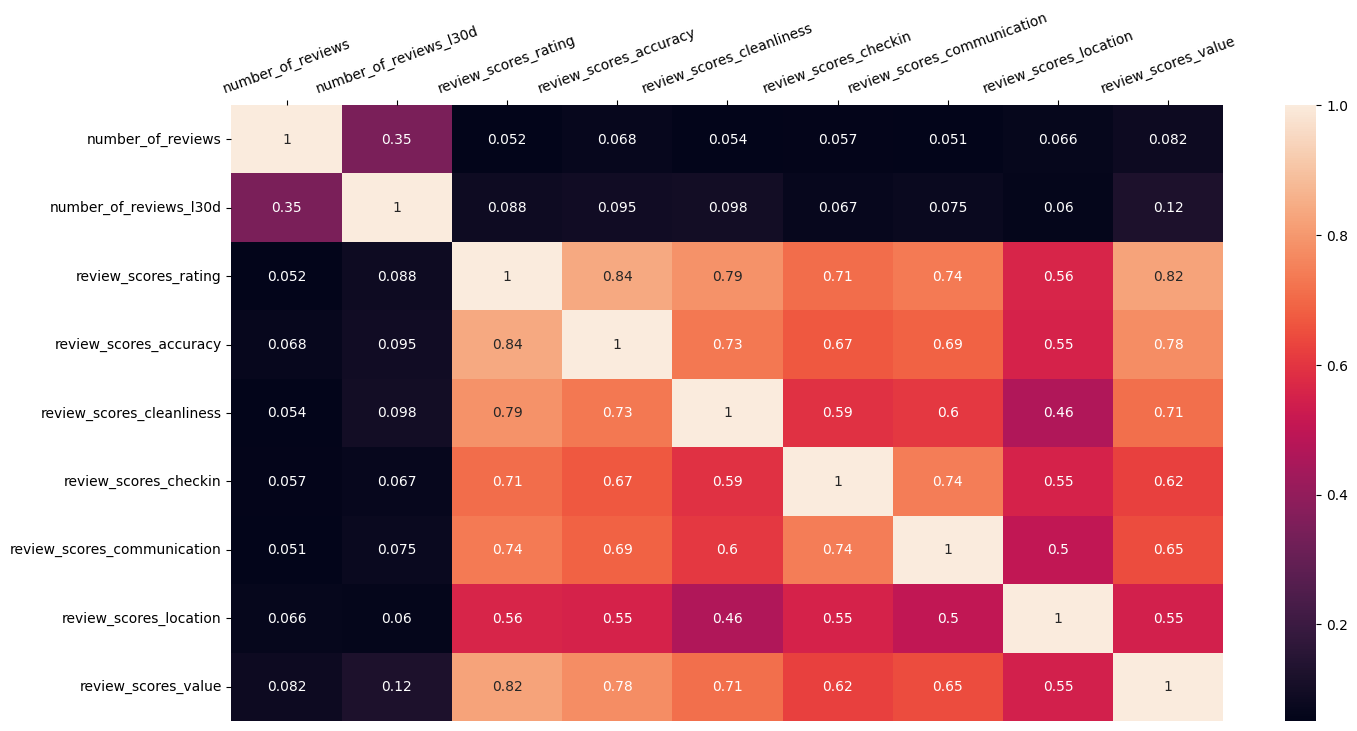

In [ ]:
teste = df[[
    'number_of_reviews', #ok
    'number_of_reviews_l30d', #ok
    'review_scores_rating', #ok
    'review_scores_accuracy',
    'review_scores_cleanliness', # (nn tô incluindo outras features de review para ter melhor interpretabilidade dos resultados depois) 
    'review_scores_checkin', #ok
    'review_scores_communication',
    'review_scores_location', #ok
    'review_scores_value',
]].dropna().corr()

plt.figure(figsize=(16,8))
hm = sns.heatmap(teste, annot=True)
hm.set(xlabel="", ylabel="")
hm.xaxis.tick_top()
plt.xticks(rotation=20)
plt.show()